<a href="https://colab.research.google.com/github/sinha96/kaggel_dataset_analysis/blob/master/538characters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all the required Libraries and connecting my google drive


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/538/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
os.listdir(os.getcwd())
os.chdir(root_path)

In [0]:
os.listdir(os.getcwd())

['README.md', 'dc-wikia-data.csv', 'marvel-wikia-data.csv']

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

# Importing the data from drive

In [0]:
dc = pd.read_csv('dc-wikia-data.csv')
dc.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


# Checking the null data

In [0]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 13 columns):
page_id             6896 non-null int64
name                6896 non-null object
urlslug             6896 non-null object
ID                  4883 non-null object
ALIGN               6295 non-null object
EYE                 3268 non-null object
HAIR                4622 non-null object
SEX                 6771 non-null object
GSM                 64 non-null object
ALIVE               6893 non-null object
APPEARANCES         6541 non-null float64
FIRST APPEARANCE    6827 non-null object
YEAR                6827 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 700.5+ KB


# Percentage of null value present in the respected columns

In [0]:
round((dc.isnull().sum()/6896)*100,5)

page_id              0.00000
name                 0.00000
urlslug              0.00000
ID                  29.19084
ALIGN                8.71520
EYE                 52.61021
HAIR                32.97564
SEX                  1.81265
GSM                 99.07193
ALIVE                0.04350
APPEARANCES          5.14791
FIRST APPEARANCE     1.00058
YEAR                 1.00058
dtype: float64

# Dropping the columns in which there more 30% null value



In [0]:
dc_clean = dc.copy()
dc_clean.drop(['EYE','GSM','HAIR','urlslug','FIRST APPEARANCE'],axis=1,inplace=True)
dc_clean.dropna(axis=0,inplace=True)

In [0]:
dc_clean.head()

,page_id,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,YEAR
0,1422,Batman (Bruce Wayne),Secret Identity,Good Characters,Male Characters,Living Characters,3093.0,1939.0
1,23387,Superman (Clark Kent),Secret Identity,Good Characters,Male Characters,Living Characters,2496.0,1986.0
2,1458,Green Lantern (Hal Jordan),Secret Identity,Good Characters,Male Characters,Living Characters,1565.0,1959.0
3,1659,James Gordon (New Earth),Public Identity,Good Characters,Male Characters,Living Characters,1316.0,1987.0
4,1576,Richard Grayson (New Earth),Secret Identity,Good Characters,Male Characters,Living Characters,1237.0,1940.0


In [0]:
dc_clean.tail()

,page_id,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
6521,134773,Jeffrey Graham (New Earth),Public Identity,Good Characters,Male Characters,Living Characters,1.0,May,1951.0
6522,277385,Kay (New Earth),Public Identity,Good Characters,Male Characters,Living Characters,1.0,August,1946.0
6523,366214,Carnie Callahan (New Earth),Public Identity,Good Characters,Male Characters,Living Characters,1.0,May,1944.0
6526,1510,Green Arrow (Oliver Queen),Secret Identity,Good Characters,Male Characters,Living Characters,1.0,November,1941.0
6528,200609,Robert Mason (New Earth),Secret Identity,Neutral Characters,Male Characters,Living Characters,1.0,February,1941.0


# Tagging the characters according to there universe

In [0]:
dc_clean['universe'] = 'DC'

# Doing same thing for Marvel characters

In [0]:
marvel = pd.read_csv('marvel-wikia-data.csv')
marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [0]:
marvel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
page_id             16376 non-null int64
name                16376 non-null object
urlslug             16376 non-null object
ID                  12606 non-null object
ALIGN               13564 non-null object
EYE                 6609 non-null object
HAIR                12112 non-null object
SEX                 15522 non-null object
GSM                 90 non-null object
ALIVE               16373 non-null object
APPEARANCES         15280 non-null float64
FIRST APPEARANCE    15561 non-null object
Year                15561 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [0]:
round(marvel.isnull().sum()/16376*100,2)

page_id              0.00
name                 0.00
urlslug              0.00
ID                  23.02
ALIGN               17.17
EYE                 59.64
HAIR                26.04
SEX                  5.21
GSM                 99.45
ALIVE                0.02
APPEARANCES          6.69
FIRST APPEARANCE     4.98
Year                 4.98
dtype: float64

In [0]:
marvel_clean = marvel.copy()
marvel_clean.drop(['EYE','GSM','HAIR','urlslug'],axis=1,inplace=True)
marvel_clean.dropna(axis=0,inplace=True)

In [0]:
marvel_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9569 entries, 0 to 15038
Data columns (total 9 columns):
page_id             9569 non-null int64
name                9569 non-null object
ID                  9569 non-null object
ALIGN               9569 non-null object
SEX                 9569 non-null object
ALIVE               9569 non-null object
APPEARANCES         9569 non-null float64
FIRST APPEARANCE    9569 non-null object
Year                9569 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 747.6+ KB


In [0]:
marvel_clean.drop('FIRST APPEARANCE',axis=1,inplace=True)

In [0]:
marvel_clean['universe'] = 'Marvel'

In [0]:
dc_clean.head()

,page_id,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,YEAR,universe
0,1422,Batman (Bruce Wayne),Secret Identity,Good Characters,Male Characters,Living Characters,3093.0,1939.0,DC
1,23387,Superman (Clark Kent),Secret Identity,Good Characters,Male Characters,Living Characters,2496.0,1986.0,DC
2,1458,Green Lantern (Hal Jordan),Secret Identity,Good Characters,Male Characters,Living Characters,1565.0,1959.0,DC
3,1659,James Gordon (New Earth),Public Identity,Good Characters,Male Characters,Living Characters,1316.0,1987.0,DC
4,1576,Richard Grayson (New Earth),Secret Identity,Good Characters,Male Characters,Living Characters,1237.0,1940.0,DC


In [0]:
marvel_clean.head()

,page_id,name,ID,ALIGN,SEX,ALIVE,APPEARANCES,Year,universe
0,1678,Spider-Man (Peter Parker),Secret Identity,Good Characters,Male Characters,Living Characters,4043.0,1962.0,Marvel
1,7139,Captain America (Steven Rogers),Public Identity,Good Characters,Male Characters,Living Characters,3360.0,1941.0,Marvel
2,64786,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Male Characters,Living Characters,3061.0,1974.0,Marvel
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Male Characters,Living Characters,2961.0,1963.0,Marvel
4,2460,Thor (Thor Odinson),No Dual Identity,Good Characters,Male Characters,Living Characters,2258.0,1950.0,Marvel


# In order to merge  DC and Marvel all the columns should be in case and name

In [0]:
col = []
for i in marvel_clean.columns:
  col.append(i.lower())
marvel_clean.columns = col
col_dc = []
for i in dc_clean.columns:
  col_dc.append(i.lower())
dc_clean.columns = col_dc

In [0]:
dc_clean.columns

Index(['page_id', 'name', 'id', 'align', 'sex', 'alive', 'appearances', 'year',
       'universe'],
      dtype='object')

In [0]:
marvel_clean.columns

Index(['page_id', 'name', 'id', 'align', 'sex', 'alive', 'appearances', 'year',
       'universe'],
      dtype='object')

# Merging both Dataframes

In [0]:
superhero = pd.concat([dc_clean,marvel_clean])

In [0]:
superhero.head()

,page_id,name,id,align,sex,alive,appearances,year,universe
0,1422,Batman (Bruce Wayne),Secret Identity,Good Characters,Male Characters,Living Characters,3093.0,1939.0,DC
1,23387,Superman (Clark Kent),Secret Identity,Good Characters,Male Characters,Living Characters,2496.0,1986.0,DC
2,1458,Green Lantern (Hal Jordan),Secret Identity,Good Characters,Male Characters,Living Characters,1565.0,1959.0,DC
3,1659,James Gordon (New Earth),Public Identity,Good Characters,Male Characters,Living Characters,1316.0,1987.0,DC
4,1576,Richard Grayson (New Earth),Secret Identity,Good Characters,Male Characters,Living Characters,1237.0,1940.0,DC


In [0]:
superhero.tail()

,page_id,name,id,align,sex,alive,appearances,year,universe
15028,579299,Peter Brown (Earth-616),No Dual Identity,Good Characters,Male Characters,Living Characters,1.0,2013.0,Marvel
15029,670470,Pukatus Jr. (Legion Personality) (Earth-616),Secret Identity,Neutral Characters,Male Characters,Living Characters,1.0,2013.0,Marvel
15030,606381,Robert Michaud (Earth-616),Secret Identity,Neutral Characters,Male Characters,Deceased Characters,1.0,2013.0,Marvel
15034,687320,War (11th Century) (Earth-616),Secret Identity,Bad Characters,Male Characters,Deceased Characters,1.0,2013.0,Marvel
15038,670426,Zubar (Legion Personality) (Earth-616),Secret Identity,Neutral Characters,Male Characters,Living Characters,1.0,2013.0,Marvel


# Factorizing all the object columns

In [0]:
superhero.name , name = pd.factorize(superhero.name)
superhero.id , id_name = pd.factorize(superhero.id)
superhero['align'], alignm_name = pd.factorize(superhero['align'])
superhero.sex , sex_name = pd.factorize(superhero.sex)
superhero.universe , univr_type = pd.factorize(superhero.universe)
superhero.alive, alive = pd.factorize(superhero.alive)
superhero.appearances = superhero.appearances.astype('int64')
superhero.year = superhero.year.astype('int64')

In [0]:
superhero.head()

,page_id,name,id,align,sex,alive,appearances,year,universe
0,1422,0,0,0,0,0,3093,1939,0
1,23387,1,0,0,0,0,2496,1986,0
2,1458,2,0,0,0,0,1565,1959,0
3,1659,3,1,0,0,0,1316,1987,0
4,1576,4,0,0,0,0,1237,1940,0


In [0]:
from sklearn.utils import shuffle
superhero = shuffle(superhero)

In [0]:
superhero.head()

,page_id,name,id,align,sex,alive,appearances,year,universe
13590,19315,13007,0,0,1,0,1,1996,1
3514,181484,2547,0,1,0,0,5,2006,0
3622,177624,2622,1,0,1,1,5,1995,0
11586,718956,12064,1,1,0,0,1,1949,1
4327,301849,3057,1,0,1,0,3,2011,0


# Comparing the number of characters launched by both universe in each year

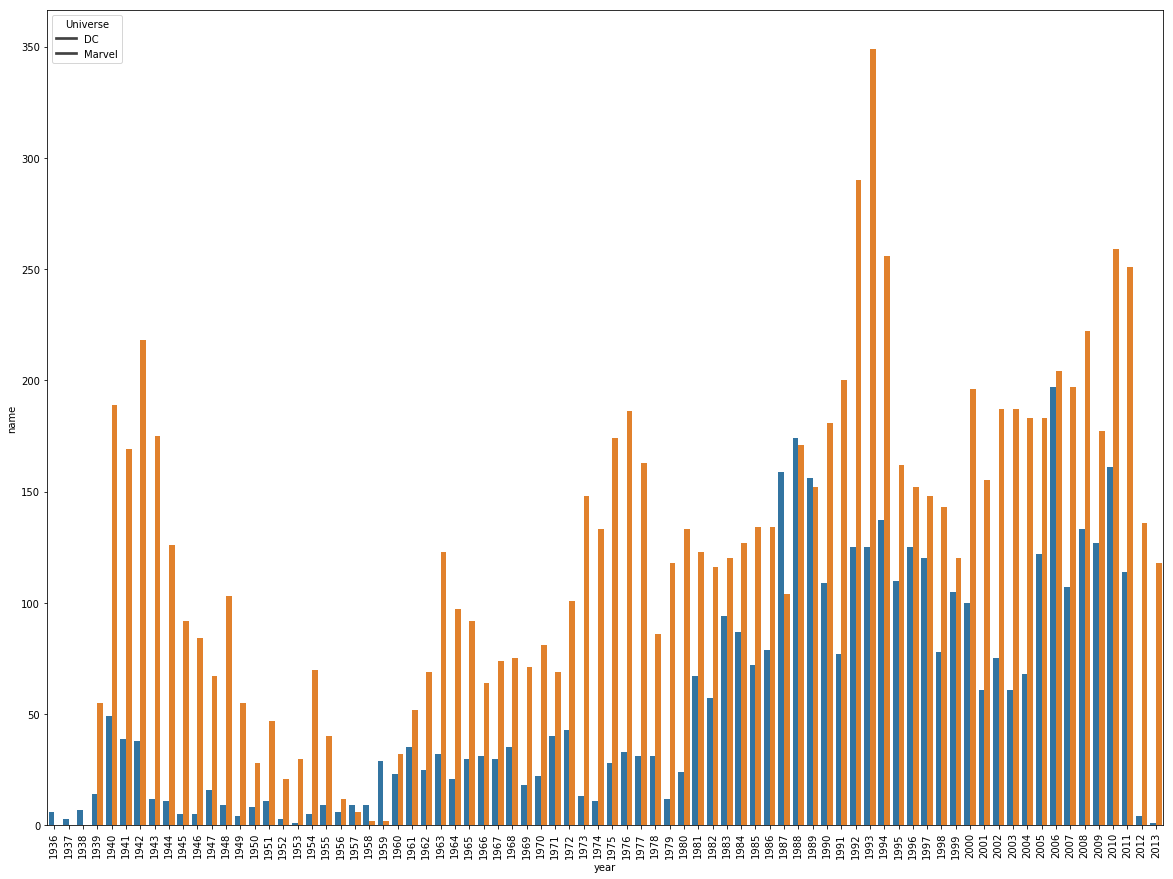

In [0]:
fig = plt.figure(figsize=(20,15))
sns.barplot(x='year',y='name',hue='universe',data=superhero[['universe','name','year']].groupby(['universe','year'],as_index=False).count())
plt.xticks(rotation=90)
plt.legend(title='Universe', loc='upper left', labels=['DC', 'Marvel']);

# Making clusters for all the characters

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = sc.fit_transform(superhero)

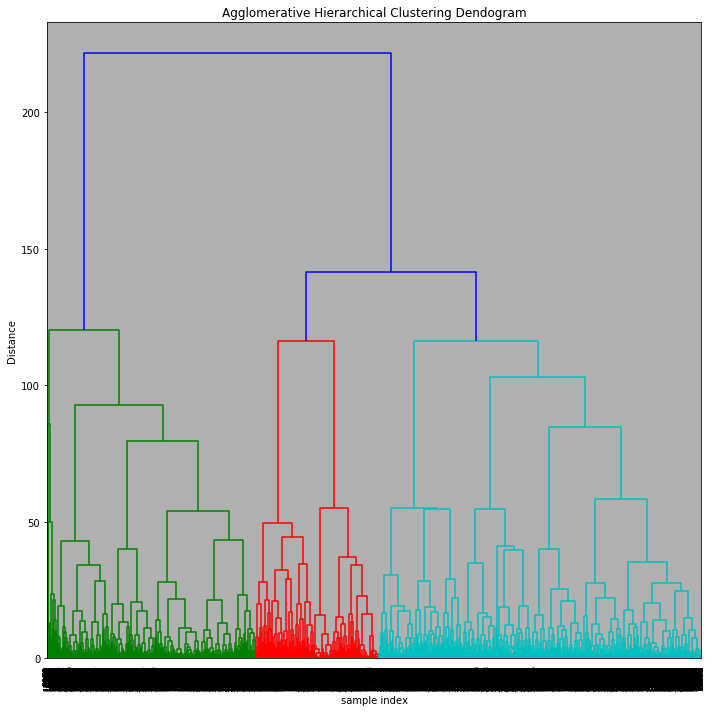

In [0]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
Z = linkage(data, 'ward')
c, coph_dists = cophenet(Z , pdist(data))
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 135, leaf_font_size=8. )
plt.tight_layout()
plt.grid()

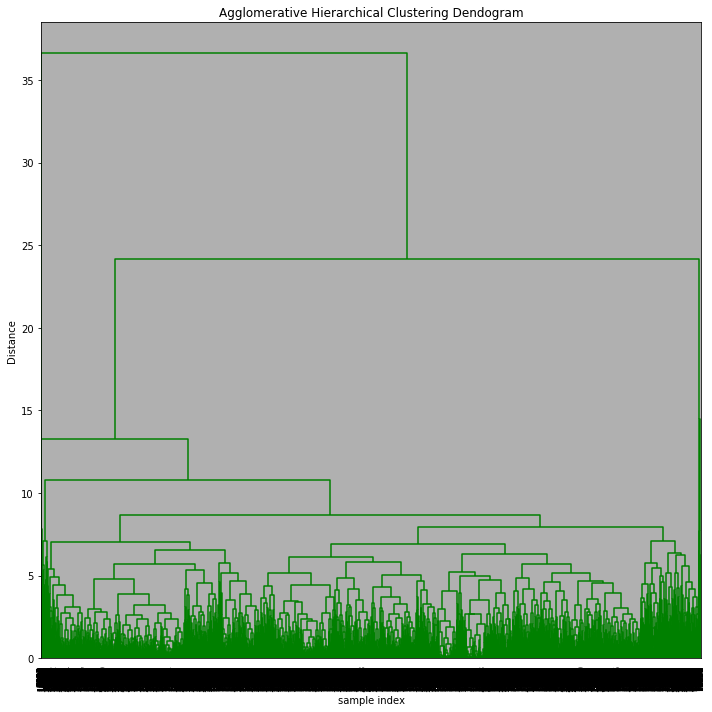

In [0]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
Z = linkage(data, 'complete')
c, coph_dists = cophenet(Z , pdist(data))
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 135, leaf_font_size=8. )
plt.tight_layout()
plt.grid()

silhoutte coef for 2 clusters is 0.2294320492913831


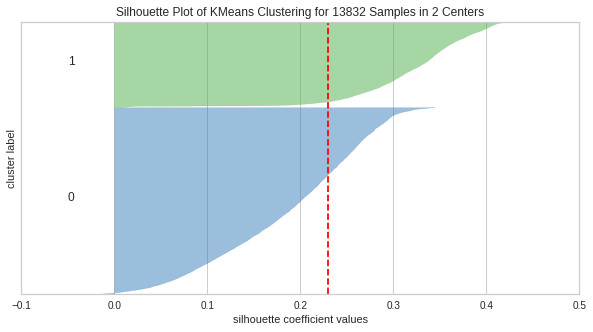

silhoutte coef for 3 clusters is 0.2035824516384223


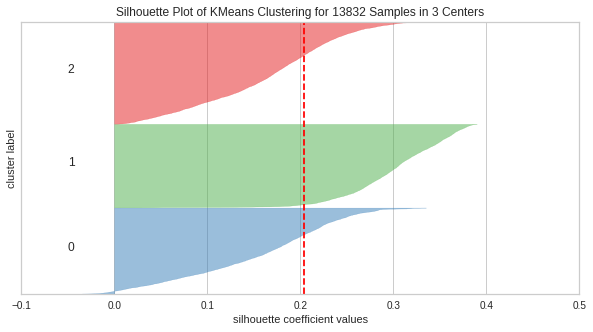

silhoutte coef for 4 clusters is 0.20938385778154311


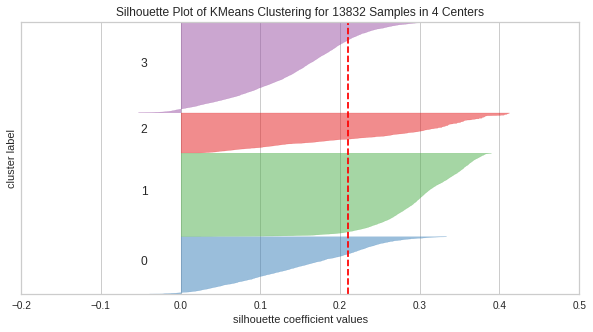

silhoutte coef for 5 clusters is 0.21387966276469716


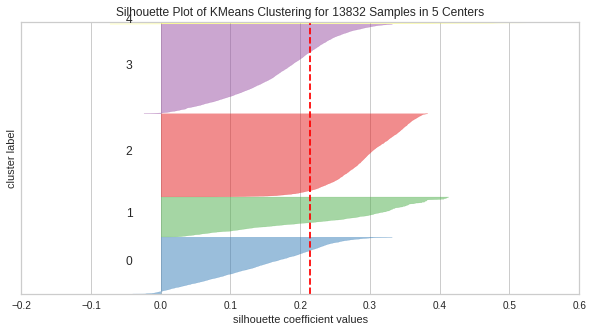

silhoutte coef for 6 clusters is 0.2149508694205938


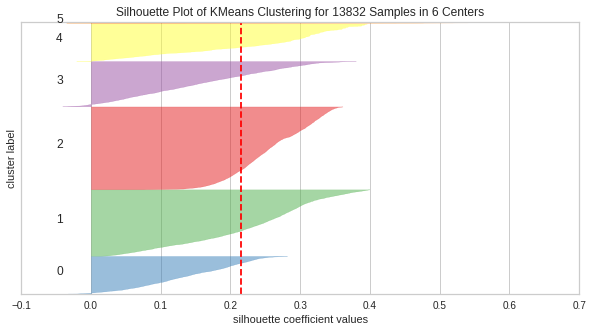

silhoutte coef for 7 clusters is 0.22268317601122664


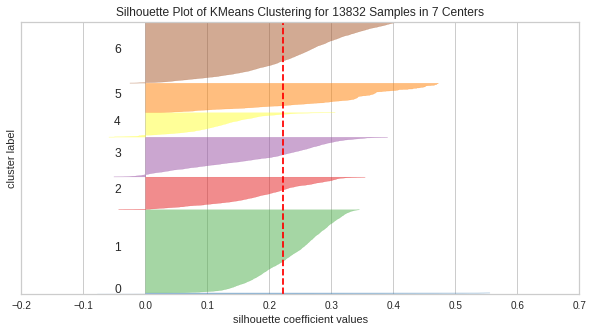

silhoutte coef for 8 clusters is 0.2309059000779608


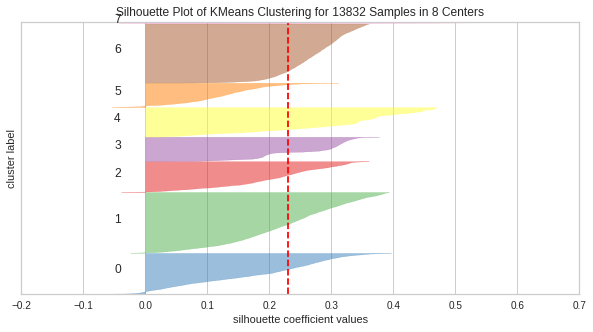

silhoutte coef for 9 clusters is 0.23708900229494131


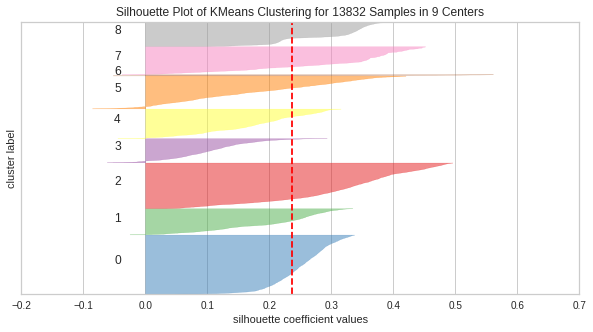

silhoutte coef for 10 clusters is 0.22491347913350918


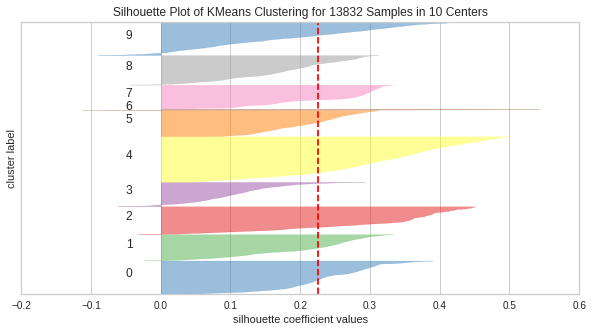

silhoutte coef for 11 clusters is 0.23574980122526185


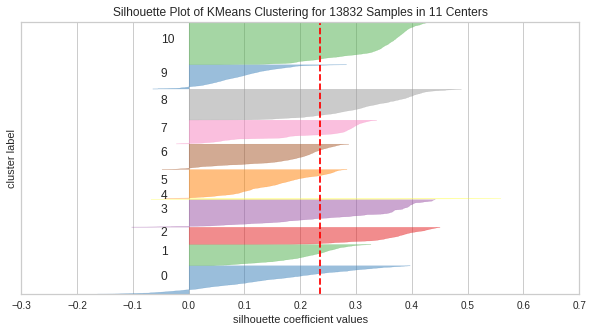

silhoutte coef for 12 clusters is 0.2502579832877448


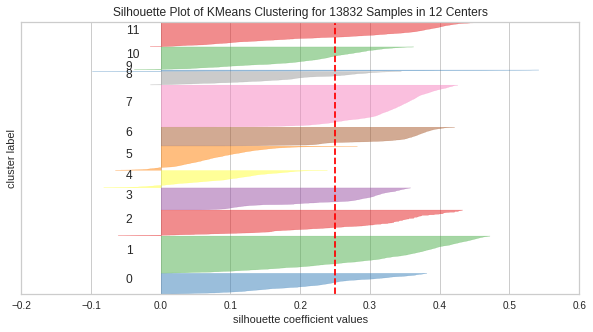

silhoutte coef for 13 clusters is 0.2623786927414257


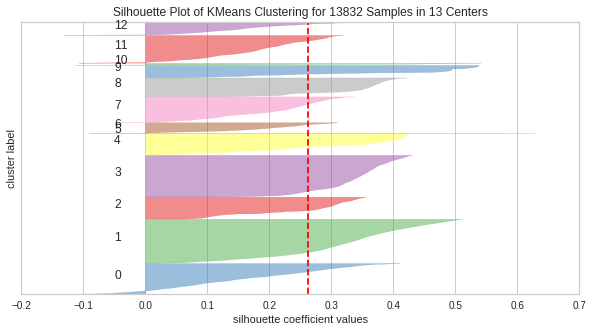

silhoutte coef for 14 clusters is 0.25027004158010124


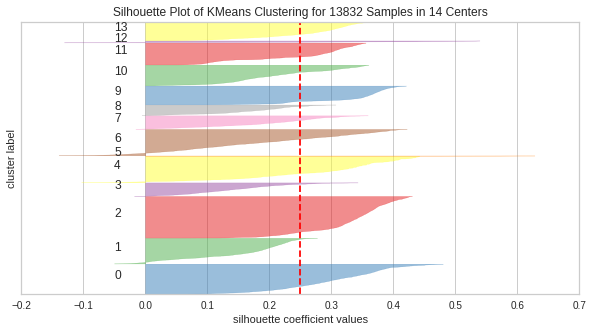

In [0]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
for i in range(2,15):
    # Instantiate the clustering model and visualizer
    clf = KMeans(n_clusters=i,random_state=42)
    print('silhoutte coef for {} clusters is {}'.format(i,silhouette_score(data, clf.fit_predict(data))))#silhoutte coef
    visualizer = SilhouetteVisualizer(clf)
    fig = plt.figure(figsize=(10,5))
    visualizer.fit(data) # Fit the training data to the visualizer
    visualizer.poof() # Draw/show/poof the data

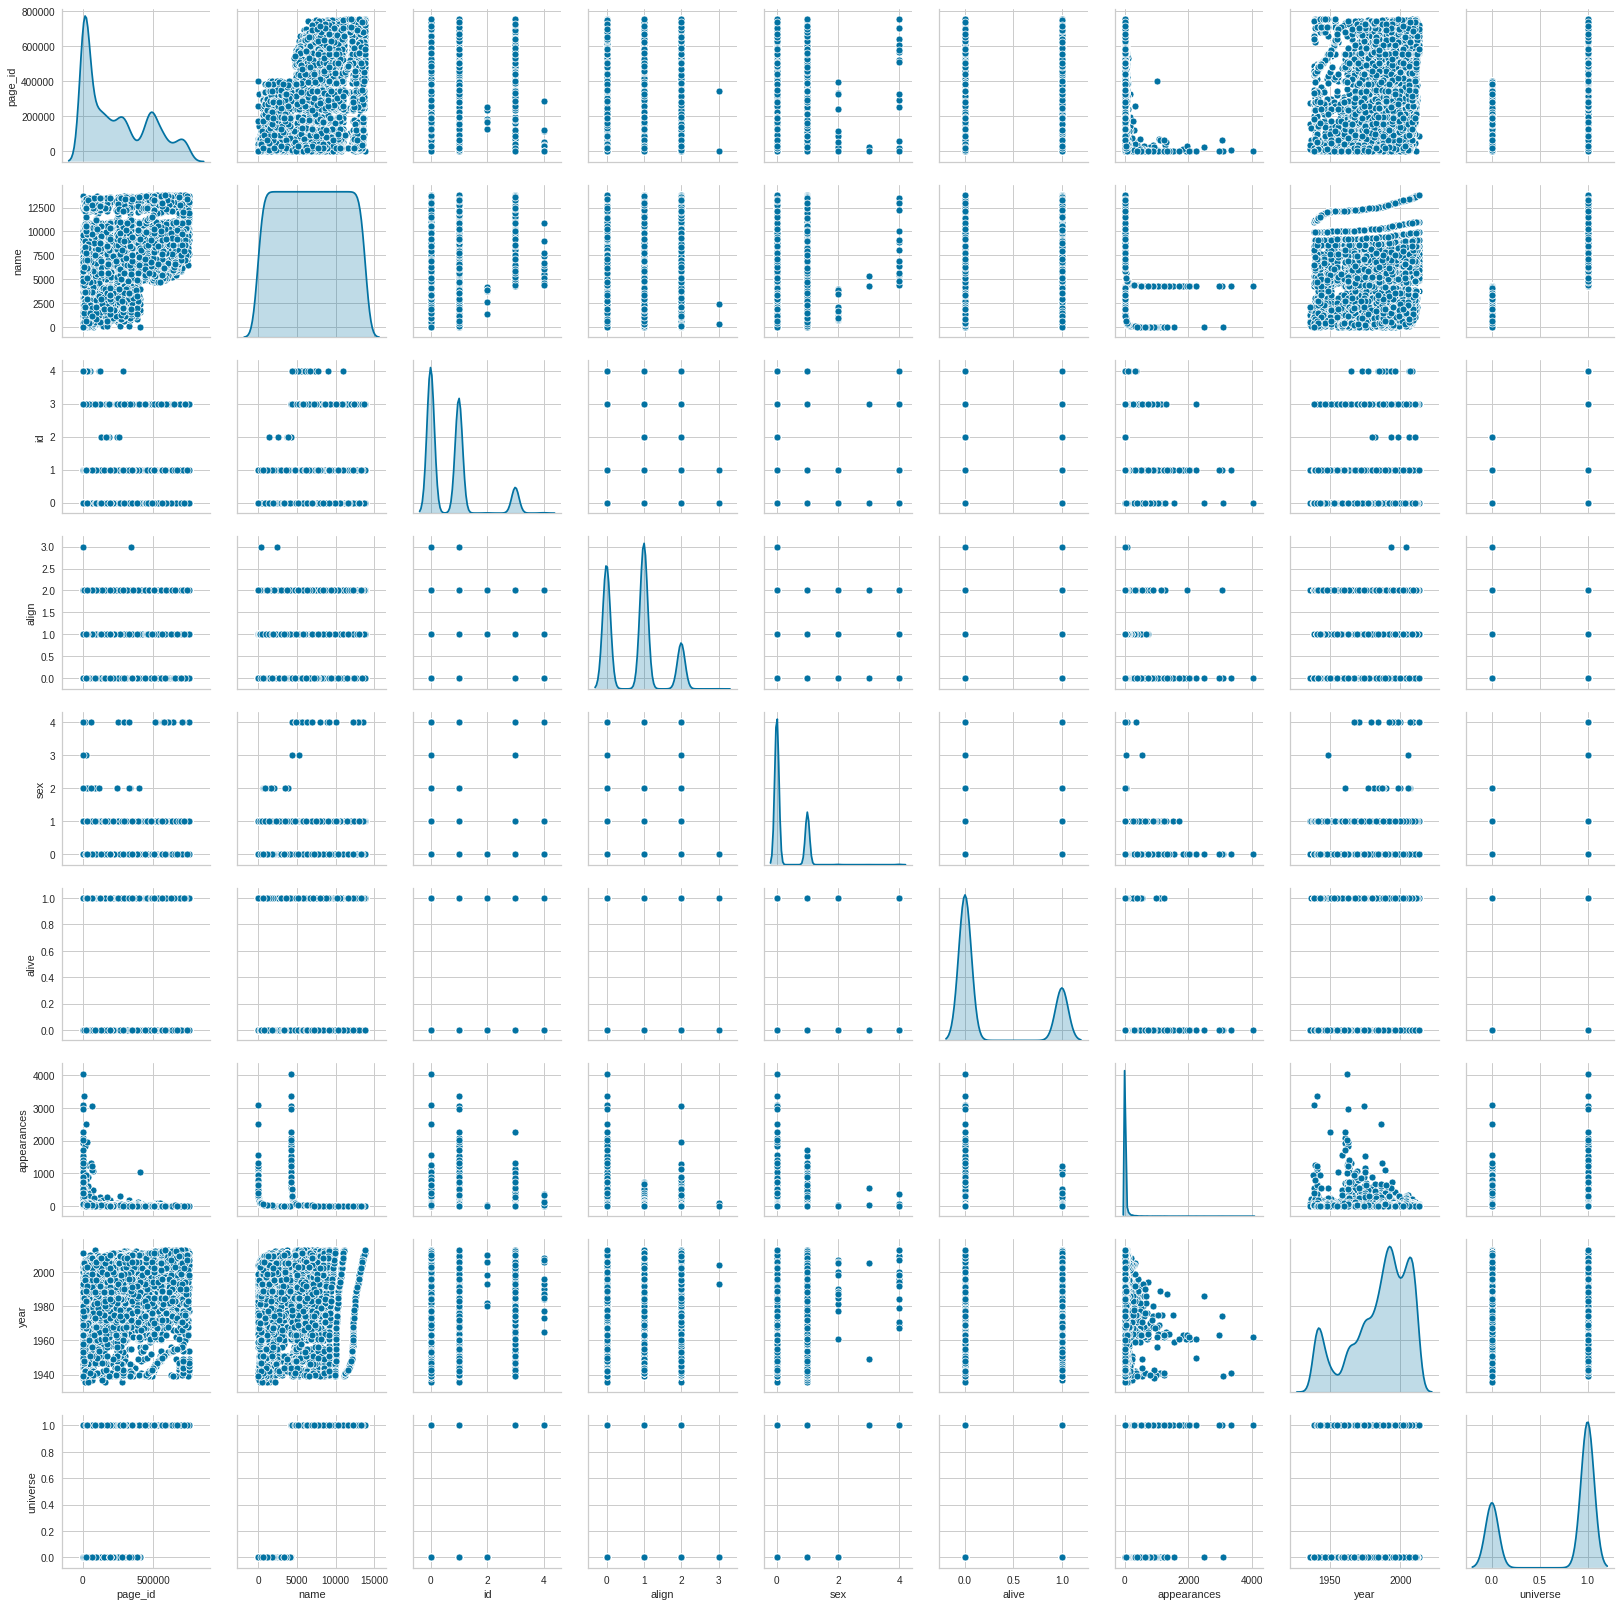

In [0]:
sns.pairplot(superhero,diag_kind='kde')

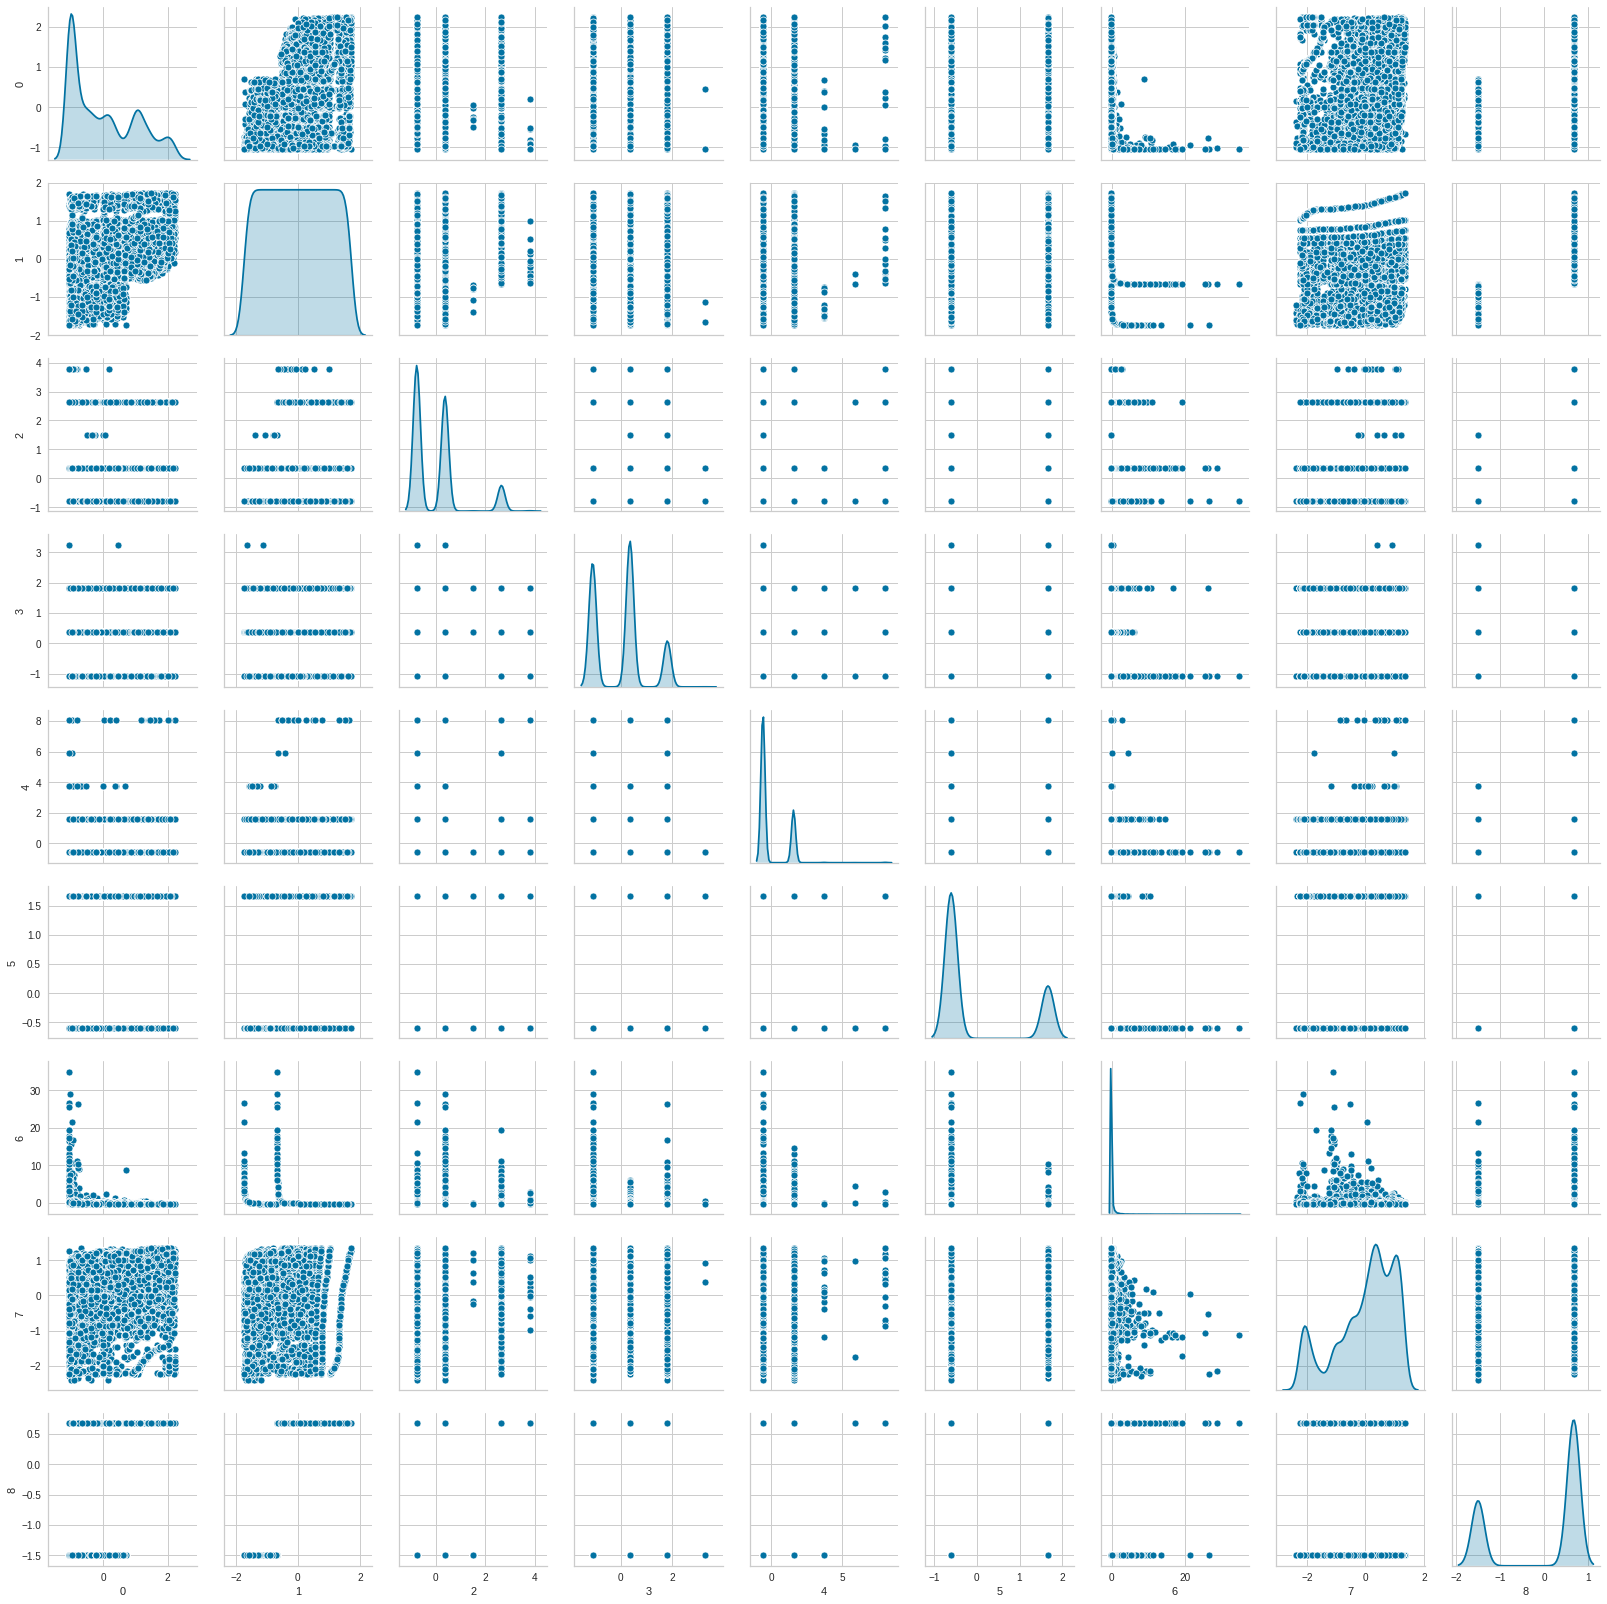

In [0]:
sns.pairplot(pd.DataFrame(data),diag_kind='kde')

In [0]:
clf = KMeans(n_clusters=3,random_state=42)
ypred = clf.fit_predict(data)
superhero['group'] = ypred

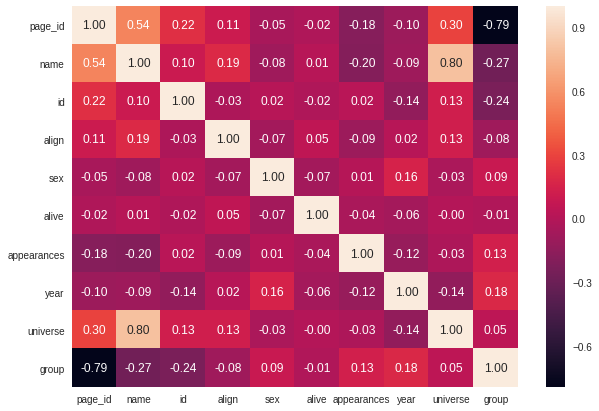

In [0]:
fig = plt.figure(figsize=(10,7))
sns.heatmap(superhero.corr(),annot=True,fmt='.2f')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bc46115f8>,
      dtype=object)

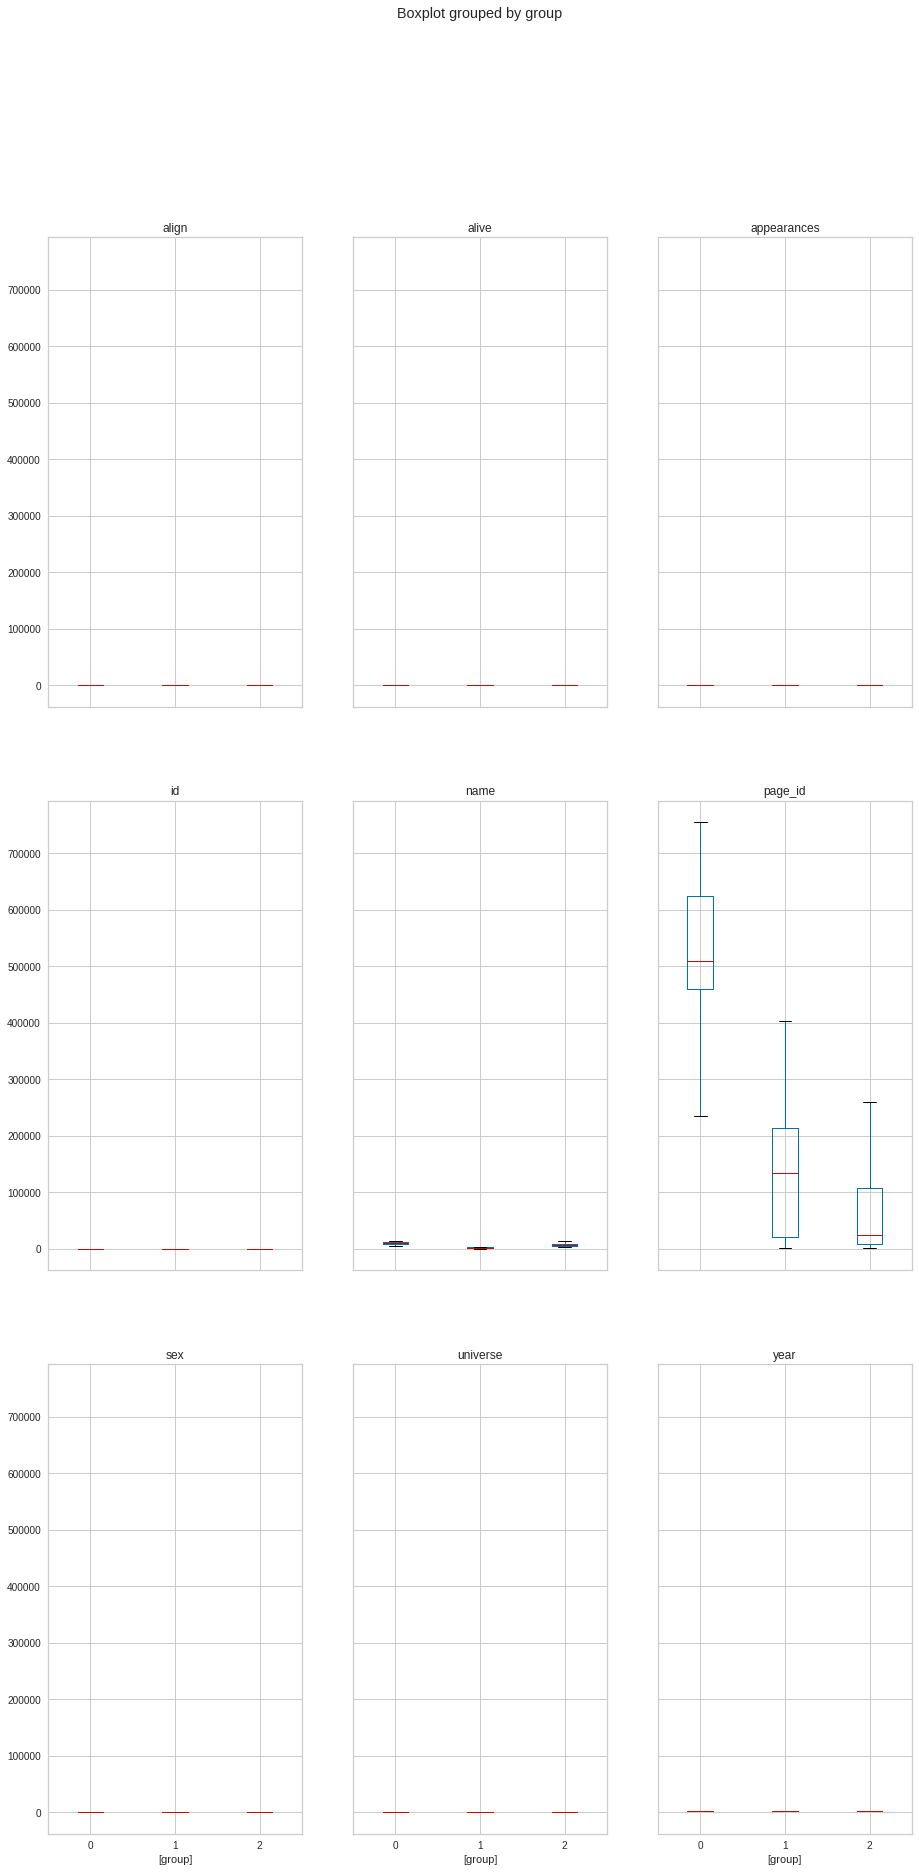

In [0]:
superhero.boxplot(by='group',  layout=(4,3), figsize=(15, 40))

## As per the below table cluster 0 contains caracters from early age Marvel universe with low popularity or less appearence, cluster 1 contains characters from DC universe and cluster 2 contains the characters from late 90's Marvel unverse with high appearence or high popularity

In [0]:
superhero[superhero.group==1].max()

page_id        404010
name             4262
id                  2
align               3
sex                 2
alive               1
appearances      3093
year             2013
universe            0
group               1
dtype: int64

In [0]:
superhero[superhero.group==1].min()

page_id        1380
name              0
id                0
align             0
sex               0
alive             0
appearances       1
year           1936
universe          0
group             1
dtype: int64

In [0]:
superhero[superhero.group==2].max()

page_id        605379
name            13749
id                  4
align               2
sex                 4
alive               1
appearances      4043
year             2013
universe            1
group               2
dtype: int64

In [0]:
superhero[superhero.group==2].min()

page_id        1025
name           4263
id                0
align             0
sex               0
alive             0
appearances       1
year           1939
universe          1
group             2
dtype: int64

In [0]:
superhero[superhero.group==0].min()

page_id        16012
name            4681
id                 0
align              0
sex                0
alive              0
appearances        1
year            1939
universe           1
group              0
dtype: int64

In [0]:
superhero[superhero.group==0].max()

page_id        755278
name            13831
id                  4
align               2
sex                 4
alive               1
appearances        95
year             2013
universe            1
group               0
dtype: int64

In [0]:
superhero[superhero.group==0].groupby('year').count()

,page_id,name,id,align,sex,alive,appearances,universe,group
year,,,,,,,,,
1939,49,49,49,49,49,49,49,49,49
1940,151,151,151,151,151,151,151,151,151
1941,136,136,136,136,136,136,136,136,136
1942,212,212,212,212,212,212,212,212,212
1943,169,169,169,169,169,169,169,169,169
1944,121,121,121,121,121,121,121,121,121
1945,90,90,90,90,90,90,90,90,90
1946,80,80,80,80,80,80,80,80,80
1947,63,63,63,63,63,63,63,63,63


In [0]:
superhero[superhero.group==2].groupby('year').count()

,page_id,name,id,align,sex,alive,appearances,universe,group
year,,,,,,,,,
1939,6,6,6,6,6,6,6,6,6
1940,38,38,38,38,38,38,38,38,38
1941,33,33,33,33,33,33,33,33,33
1942,6,6,6,6,6,6,6,6,6
1943,6,6,6,6,6,6,6,6,6
1944,5,5,5,5,5,5,5,5,5
1945,2,2,2,2,2,2,2,2,2
1946,4,4,4,4,4,4,4,4,4
1947,4,4,4,4,4,4,4,4,4
